# Credit Card Fraud Detection

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import yeojohnson
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocesing

In [2]:
MildDemented = r'C:/Users/PC/Desktop/ML/Data/creditcard_2023.csv'

In [3]:
df = pd.read_csv(MildDemented)
df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
df.describe().transpose().style.background_gradient(cmap = 'Greens')

,count,mean,std,min,25%,50%,75%,max
id,568630.000000,284314.500000,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.000000,-0.000000,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.000000,-0.000000,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.000000,-0.000000,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.000000,-0.000000,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.000000,0.000000,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.000000,-0.000000,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.000000,-0.000000,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.000000,0.000000,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.000000,0.000000,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [6]:
df.median()

id        284314.500000
V1            -0.093638
V2            -0.135894
V3             0.000353
V4            -0.073762
V5             0.081088
V6             0.078718
V7             0.233366
V8            -0.114524
V9             0.092526
V10            0.262614
V11           -0.041050
V12            0.162052
V13            0.017608
V14            0.230501
V15           -0.039256
V16            0.134026
V17            0.271641
V18            0.087294
V19           -0.025979
V20           -0.123378
V21           -0.037431
V22           -0.027329
V23           -0.059689
V24            0.015901
V25           -0.008193
V26           -0.011892
V27           -0.172911
V28           -0.013930
Amount     12030.150000
Class          0.500000
dtype: float64

In [7]:
df.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

In [8]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df = df.drop('id', axis=1)

In [11]:
df.shape

(568630, 30)

### Exploratory Data Analysis

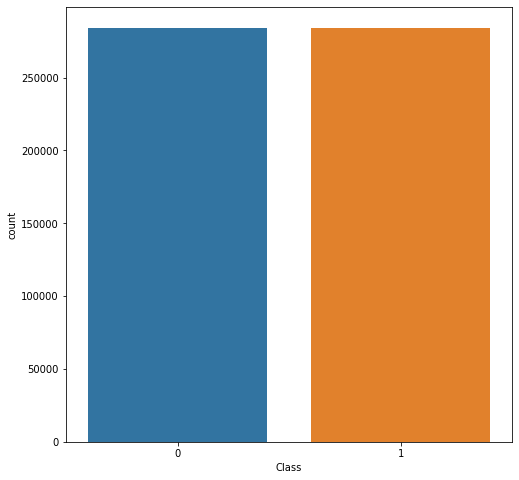

In [12]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df , x = 'Class')
plt.show()

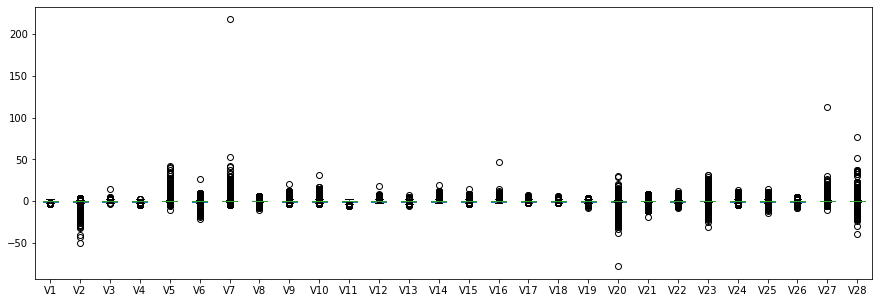

In [13]:
df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].boxplot(figsize=(15,5))
plt.grid(False)
plt.show()

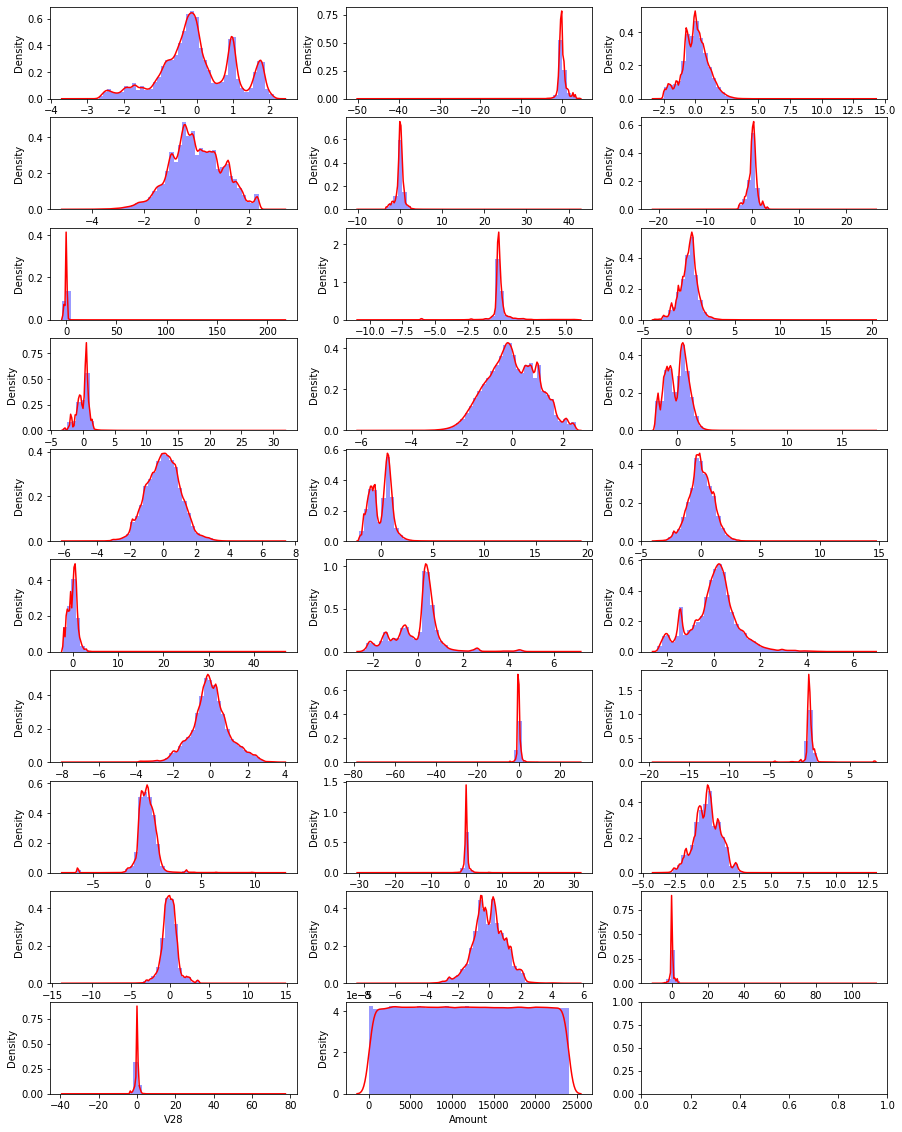

In [14]:
fig, ax = plt.subplots(10, 3, figsize=(15, 20))

sns.distplot(df['V1'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V2'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V3'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V4'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V5'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V6'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V7'],ax=ax[2,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V8'],ax=ax[2,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V9'],ax=ax[2,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V10'],ax=ax[3,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V11'],ax=ax[3,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V12'],ax=ax[3,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V13'],ax=ax[4,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V14'],ax=ax[4,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V15'],ax=ax[4,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V16'],ax=ax[5,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V17'],ax=ax[5,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V18'],ax=ax[5,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V19'],ax=ax[6,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V20'],ax=ax[6,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V21'],ax=ax[6,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V22'],ax=ax[7,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V23'],ax=ax[7,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V24'],ax=ax[7,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V25'],ax=ax[8,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V26'],ax=ax[8,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V27'],ax=ax[8,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['V28'],ax=ax[9,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Amount'],ax=ax[9,1],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

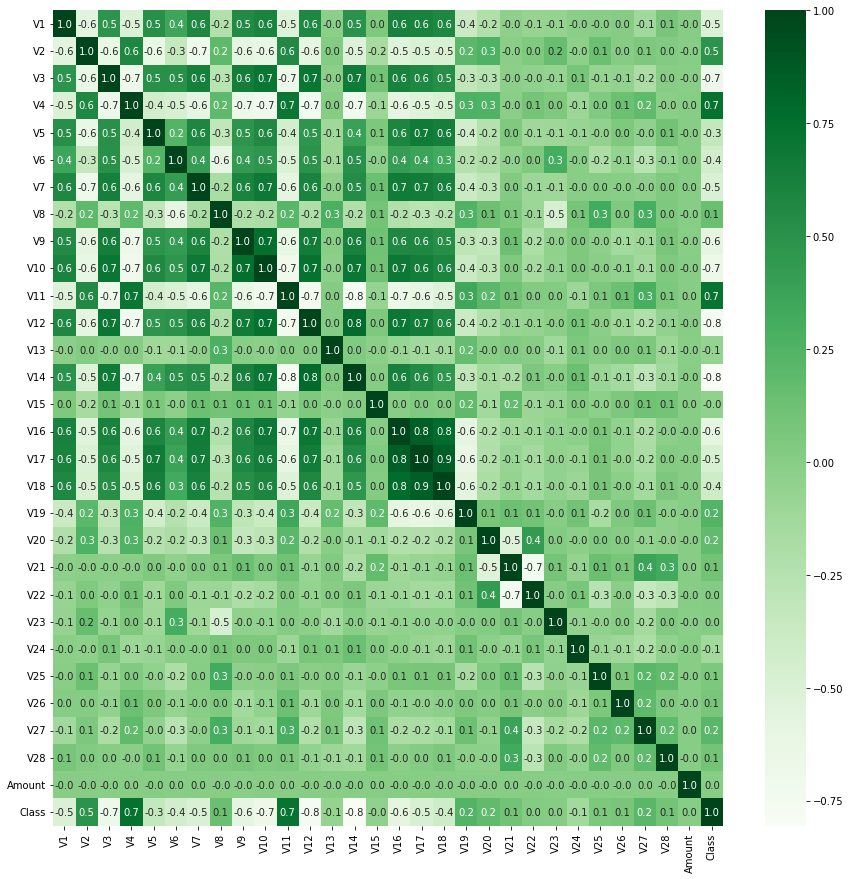

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='Greens')
plt.show()

### Select Best Features

In [16]:
X = df.drop(columns=['Class'])
y = df['Class']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
13,V14,1.051870e+06,0.000000e+00
11,V12,8.206897e+05,0.000000e+00
3,V4,6.720180e+05,0.000000e+00
10,V11,6.274231e+05,0.000000e+00
2,V3,4.947334e+05,0.000000e+00
9,V10,4.724807e+05,0.000000e+00
8,V9,2.966471e+05,0.000000e+00
15,V16,2.786986e+05,0.000000e+00
0,V1,1.954456e+05,0.000000e+00
1,V2,1.814854e+05,0.000000e+00


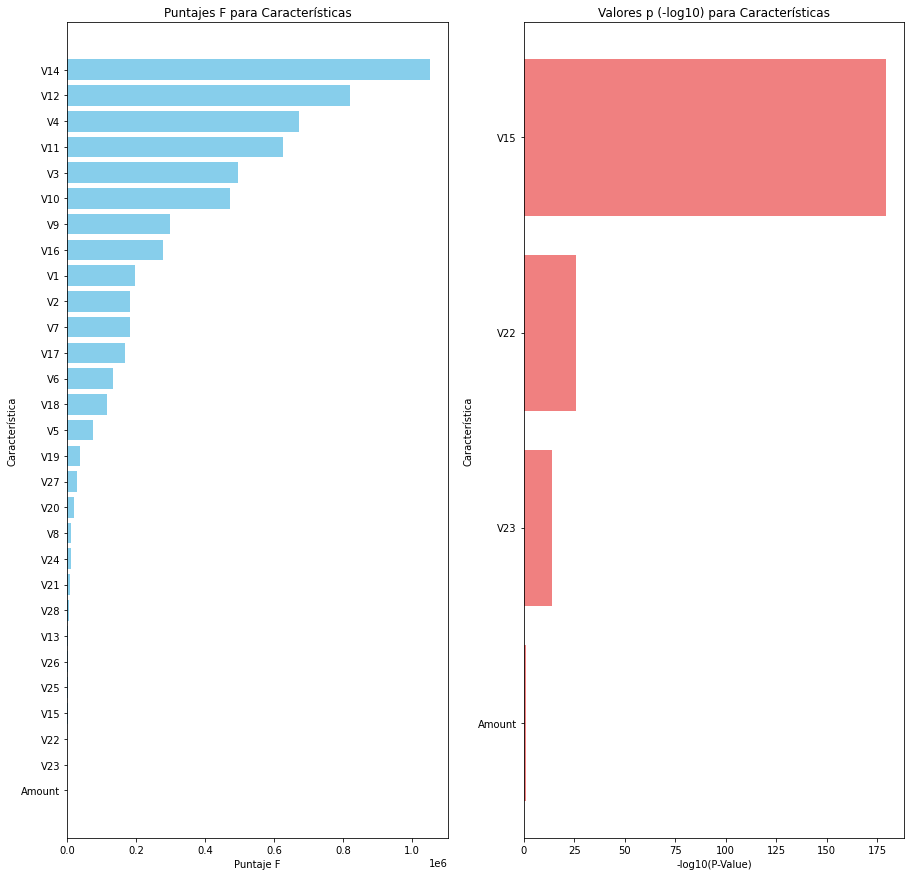

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [18]:
cols = feature_scores_df[feature_scores_df['F_Score']>=0].Feature.to_list()
X_M = df[cols]
X_M.head(1)

,V14,V12,V4,V11,V3,V10,V9,V16,V1,V2,...,V24,V21,V28,V13,V26,V25,V15,V22,V23,Amount
0,0.54902,0.293438,-0.083724,-0.98702,2.496266,0.637735,0.727159,0.215598,-0.260648,-0.469648,...,0.165959,-0.110552,-0.151045,-0.941386,-0.434824,0.12628,1.804879,0.217606,-0.134794,17982.1


### Modeling and Evaluation

In [19]:
X_transformed = X_M.apply(lambda x: yeojohnson(x)[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

### Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Logistic Regression

In [21]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

accuracy:  0.9656660159799284
mean_absolute_error:  0.03433398402007164
mean_squared_error:  0.03433398402007164


### Random Forest Classifier

In [22]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

accuracy:  0.9998886211889395
mean_absolute_error:  0.00011137881106050214
mean_squared_error:  0.00011137881106050214


### Decision Tree

In [23]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

accuracy:  0.9977841478641647
mean_absolute_error:  0.002215852135835253
mean_squared_error:  0.002215852135835253


### KNeighbors Classifier

In [24]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

accuracy:  0.9976024245408555
mean_absolute_error:  0.0023975754591444936
mean_squared_error:  0.0023975754591444936


1    85440
0    85149
Name: Class, dtype: int64


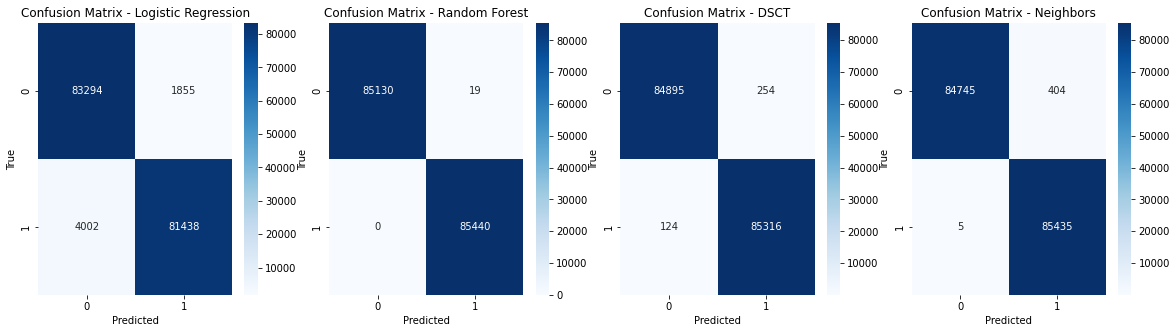

In [27]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

print(y_test.value_counts())
plt.show()

[]

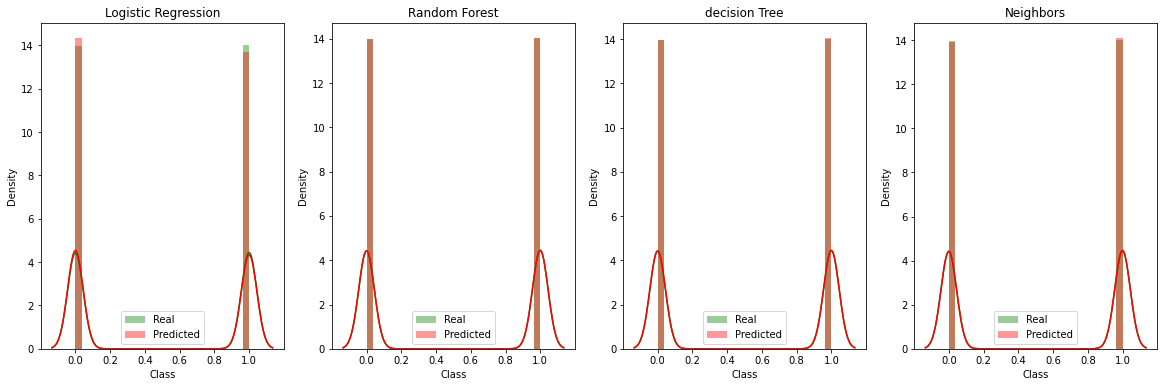

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.plot()